In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

In [22]:
# Load Dataset
df = pd.read_csv('../data/processed/gojek_reviews_preprocessed(done).csv')
df.head()

,created_at,full_text,sentiment
0,Tue Jun 17 13:13:45 +0000 2025,Pembayaran Harian yang Praktis Ada PEXX Card ...,positif
1,Tue Jun 17 12:46:31 +0000 2025,Aplikasi online yg ada fitur mobil pick up nya...,netral
2,Tue Jun 17 12:10:21 +0000 2025,Aku lagi survey data tentang seberapa sering k...,netral
3,Tue Jun 17 10:50:57 +0000 2025,@e100ss Bukan ide baru. Bahkan lahirnya gojek ...,netral
4,Tue Jun 17 10:16:52 +0000 2025,Pesan Taksi Listrik Green SM Kini Bisa via Apl...,netral


In [25]:
def generate_wordcloud_by_label(df, label_value, title):
    text = ' '.join(df[df['sentiment'] == label_value]['full_text'].astype(str))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    word_freq = Counter(tokens)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

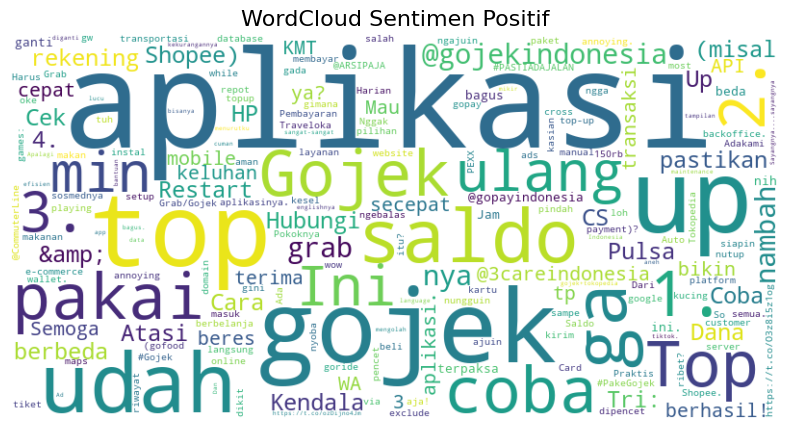

In [26]:
# Wordcloud untuk data positif
generate_wordcloud_by_label(df, 'positif', 'WordCloud Sentimen Positif')

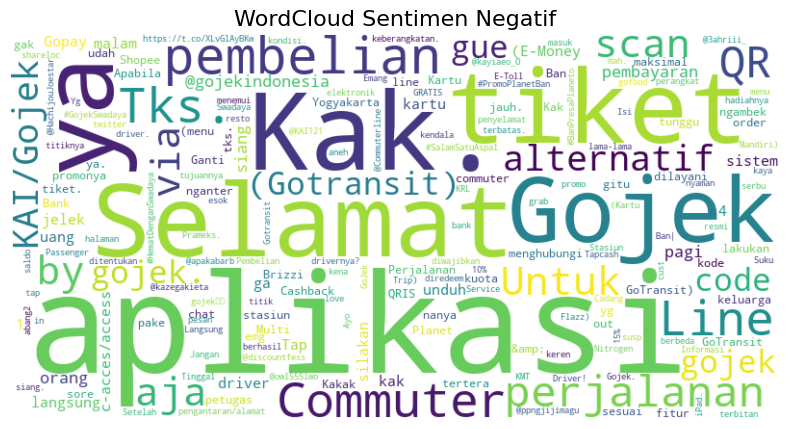

In [27]:
# Wordcloud untuk data negatif
generate_wordcloud_by_label(df, 'negatif', 'WordCloud Sentimen Negatif')

In [29]:
# Gabungkan semua teks
all_text = ' '.join(df['full_text'].astype(str))
tokens = all_text.split()

# Hilangkan stopword dan tanda baca
tokens_clean = [word for word in tokens if word not in stop_words and word not in string.punctuation]
freq_dist = Counter(tokens_clean)

# Ambil 20 kata teratas
common_words = freq_dist.most_common(20)

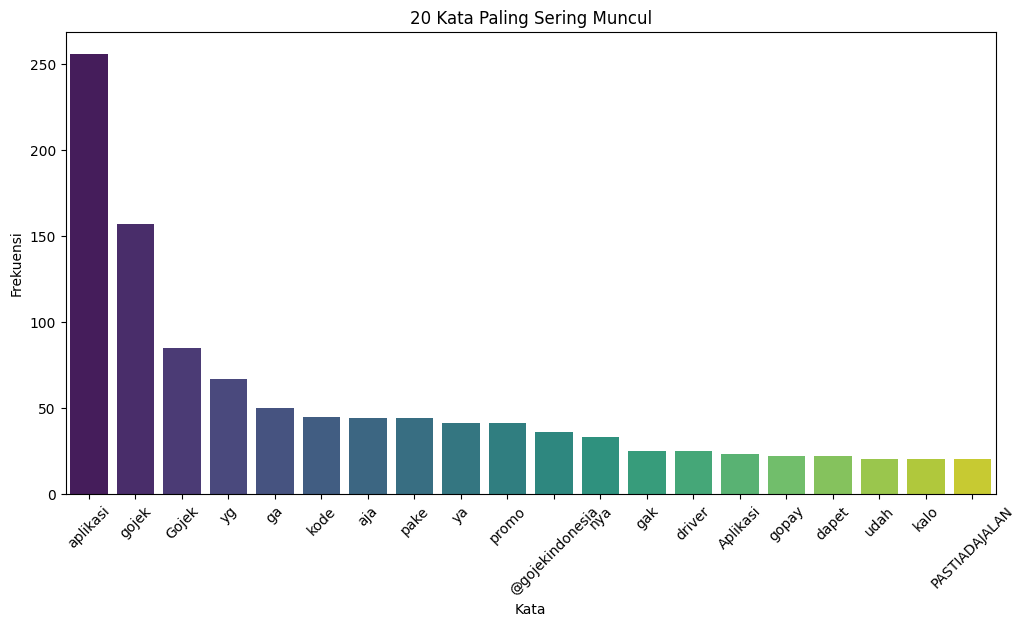

In [30]:
# Visualisasi
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('20 Kata Paling Sering Muncul')
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

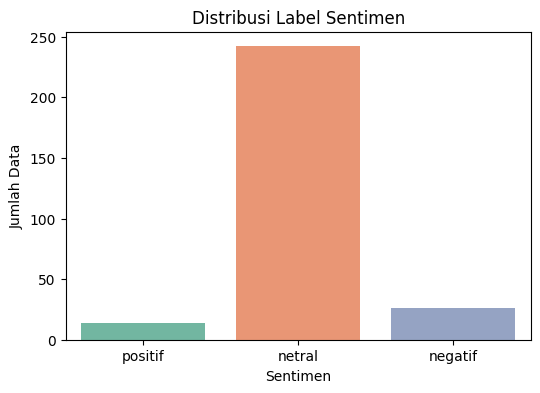

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Distribusi Label Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Data")
plt.show()